<a href="https://colab.research.google.com/github/Pedro1-21GW/sigmoidal/blob/main/Grafico_Violino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="MyLogo" width="100%" src="https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/banner_atualizado.png">


# Gráfico de Violino

Outra visualização bastante útil para entendermos a distribuição de uma variável é o Violin Plot, ou Gráfico de Violino. 

<center><img src="https://miro.medium.com/max/520/1*TTMOaNG1o4PgQd-e8LurMg.png" height="400px"></center>

Gráficos de Violino são uma forma de plotar dados numéricos, e podem ser considerados uma combinação do Box plot com o Kernel Density Plot.

No Violin Plot, podemos encontrar as mesmas informações de um Box plot, como:

* Mediana (Ponto branco no plot)
* IQR (Barra escura no centro do plot)
* Limites Superiores e Inferiores (Extremidades do Violino)
* Outliers (Pontos além dos Limites)

Mas se os gráficos de Violino mostram as mesmas informações de um Box plot, por que usar o Violin Plot?

A resposta é que há uma vantagem do Violino sobre o gráfico de Caixa. Além de mostrar as informações mencionadas acima, o Violin Plot também conta com a **distribuição de frequências** dados, o que nos dá um panorama melhor, além das informações estatísticas mencionadas anteriormente. 

> Confira como os nosso queridos `boxplots` podem nos levar a grandes confusões...[clique aqui](https://blog.bioturing.com/2018/05/16/5-reasons-you-should-use-a-violin-graph/)

Deu para entender como a frequência trazida pelo *violin plot* é importantíssima para um panorama geral mais preciso? Mas calma, esse tipo de gráfico desse ser usado de forma complementa ao gráfico de caixa (*boxplot*), afinal não é muito conhecido. 


Vamos ver na prática como plotar e utilizar esses gráficos.

## Plotando o gráfico de violino

Para plotarmos nosso gráfico de violino, vamos utilizar o mesmo conjunto de dados que utilizamos para os histogramas, com dados sobre a dengue.

Além do número de casos confirmados de dengue, o *dataset* mostra ainda dados relacionados à chuva, temperaturas média, mínima e máxima do município. O período contemplado pelo conjunto de dados é de 1998 a 2015.

In [10]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# importar dados
DATAPATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/dengue-dataset.csv"
df = pd.read_csv(DATAPATH)
df.data = pd.to_datetime(df.data)
df = df.set_index('data')

# ver as primeiras 5 entradas
df.head()


,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
data,,,,,
1998-01-01,237,179.2,25.7,20.2,28.1
1998-02-01,331,226.3,25.1,20.0,28.0
1998-03-01,562,149.1,24.8,22.4,27.2
1998-04-01,187,46.4,22.7,18.1,26.0
1998-05-01,32,88.3,19.2,15.7,22.9


Perceba que agora as datas estão no formato `datetime`.

In [11]:
df.dtypes

casos-confirmados         int64
chuva                   float64
temperatura-media       float64
temperatura-mininima    float64
temperatura-maxima      float64
dtype: object

Como vimos anteriormente, **o Violin plot mostra a distribuição dos dados, como em um histograma, assim como informações estatísticas como um Boxplot**. Para entendermos melhor como fazer esse comparativo, vamos primeiro plotar um Histograma e um Boxplot lado a lado.

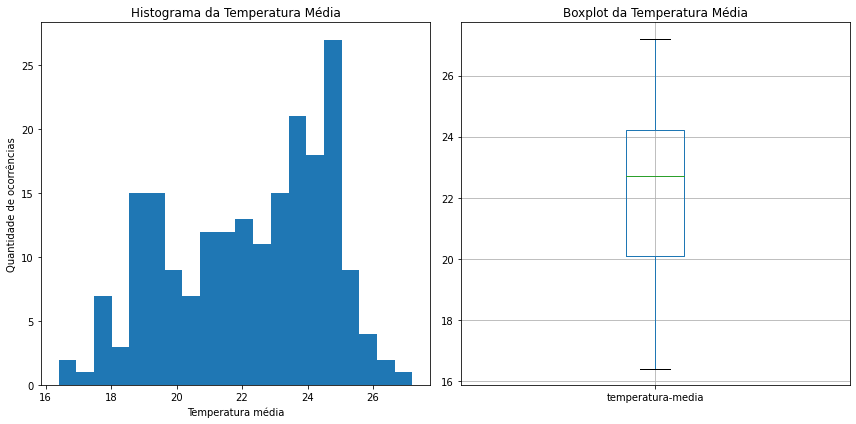

In [12]:
# plotar o histograma da temperatura média com o matplotlib 
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,figsize = (12,6))

# se fossemos usar o pandas: 
# df["temperatura-media"].plot(kind = 'hist', ax = ax)

ax0.hist(df['temperatura-media'], bins=20)
ax0.set_title("Histograma da Temperatura Média")
ax0.set_ylabel("Quantidade de ocorrências")
ax0.set_xlabel("Temperatura média")

df.boxplot('temperatura-media', ax = ax1)
ax1.set_title("Boxplot da Temperatura Média")

plt.tight_layout()

Para plotar o Violin Plot da variável `temperatura-media`, vamos importar o `Seaborn`, outra poderosa biblioteca de visualização.

**Reparem que dentro do violin plot, existe uma estrutura que lembra o *box plot*, além de conseguirmos ver o ponto branco, marcando a mediana.
As "curvas" do violino, representam a distribuição.** 

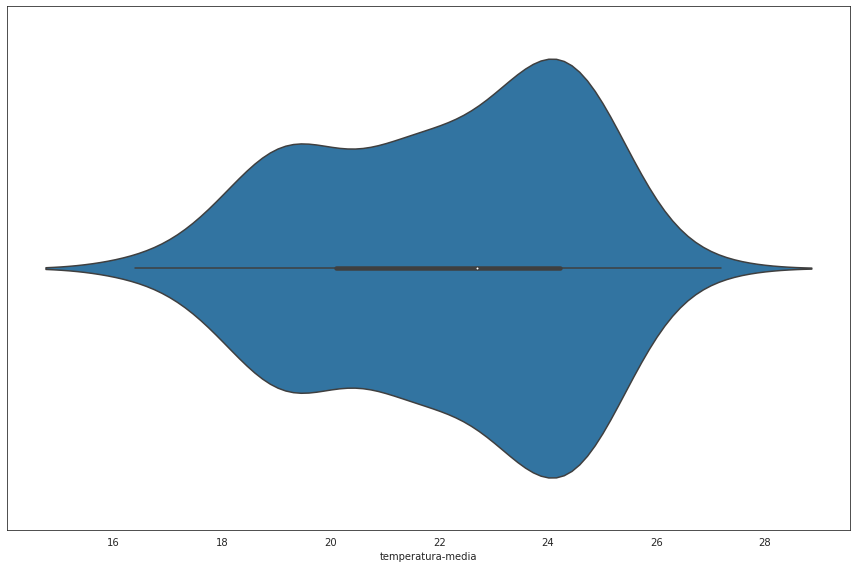

In [17]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,8))

sns.violinplot(x = df['temperatura-media'], ax = ax)
plt.tight_layout()

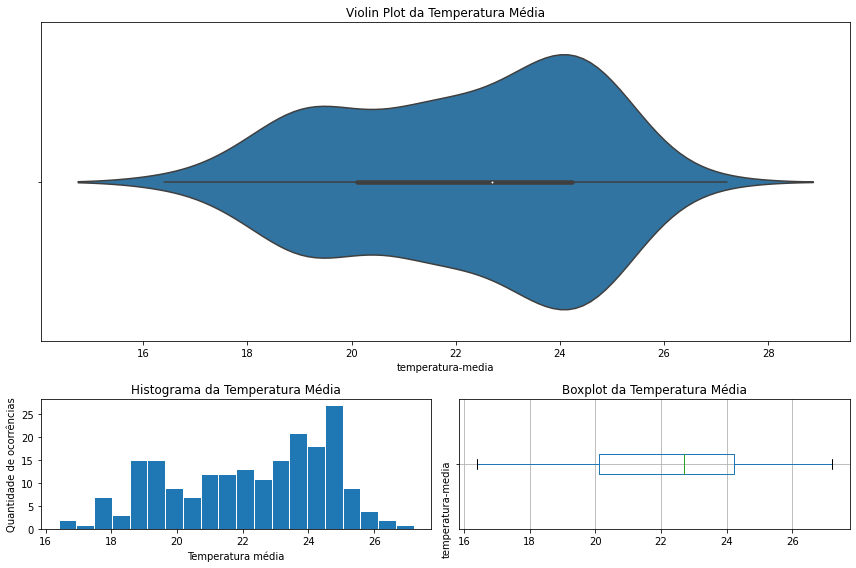

In [14]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

# definindo o tema
sns.set_style('white')

# plotar o violin para a variável em questão

sns.violinplot(x = df['temperatura-media'], ax = ax1)
ax1.set_title("Violin Plot da Temperatura Média")


ax2.hist(df['temperatura-media'], bins=20)
ax2.set_title("Histograma da Temperatura Média")
ax2.set_ylabel("Quantidade de ocorrências")
ax2.set_xlabel("Temperatura média")

df.boxplot('temperatura-media', ax = ax3, vert=False, rot = 90)
ax3.set_title("Boxplot da Temperatura Média")

plt.tight_layout()